<a href="https://colab.research.google.com/github/ltc870/MLA_LTC/blob/main/FinalProject_Regression_LTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project - Linear Regression

## Lawrence Caudle

## CS-430-ON

## Machine Learning in the Cloud

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Imports for specific models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.linear_model import LinearRegression

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## 2. Acquire Data

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/FinalProject/data/sleep_health_and_lifestyle.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [11]:
# drop each row that has "Normal Weight"
df = df[df["BMI Category"] != "Normal Weight"]
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 3. Statistics and Visual Exploration

In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,190.569405,42.410765,7.120113,7.305949,59.101983,5.396601,70.099150,6819.830028
std,108.034224,8.673601,0.805498,1.185803,21.065801,1.790502,4.102913,1614.037489
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,97.000000,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,194.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,283.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [13]:
count = df['BMI Category'].value_counts().reset_index()
count

,BMI Category,count
0,Normal,195
1,Overweight,148
2,Obese,10


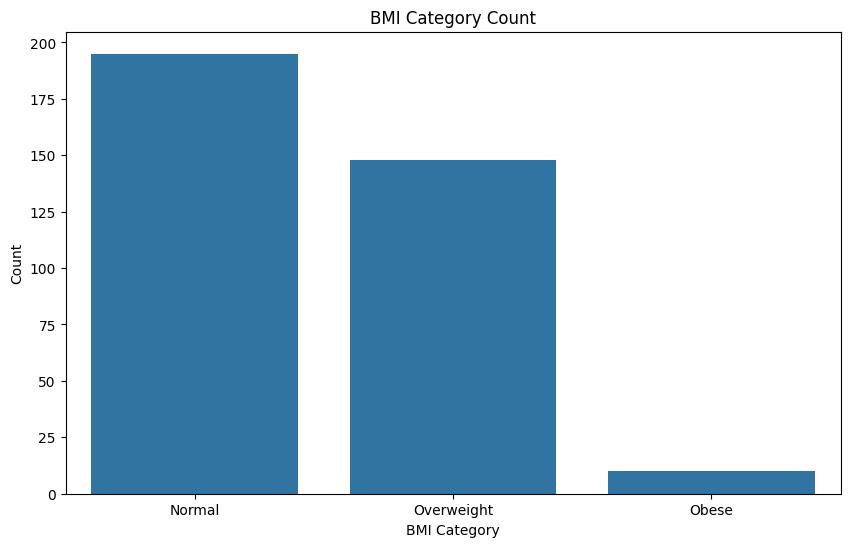

In [14]:
# BMI Category Count
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI Category', y='count', data=count)
plt.title('BMI Category Count')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

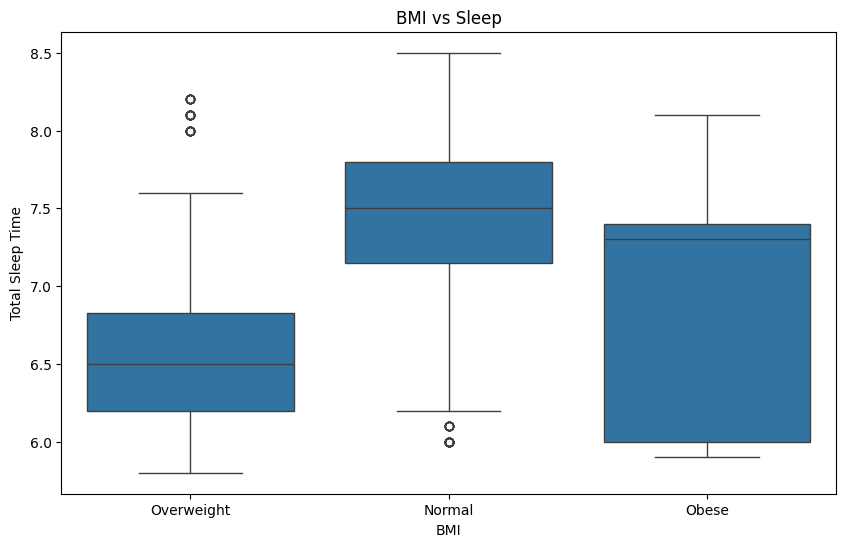

In [15]:
# BMI vs Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('BMI vs Sleep')
plt.xlabel('BMI')
plt.ylabel('Total Sleep Time')
plt.show()

In [16]:
# Occupation count dataframe
occupation_count = df['Occupation'].value_counts().reset_index()
occupation_count

,Occupation,count
0,Doctor,69
1,Nurse,66
2,Engineer,59
3,Lawyer,46
4,Teacher,40
5,Accountant,32
6,Salesperson,32
7,Scientist,4
8,Software Engineer,2
9,Sales Representative,2


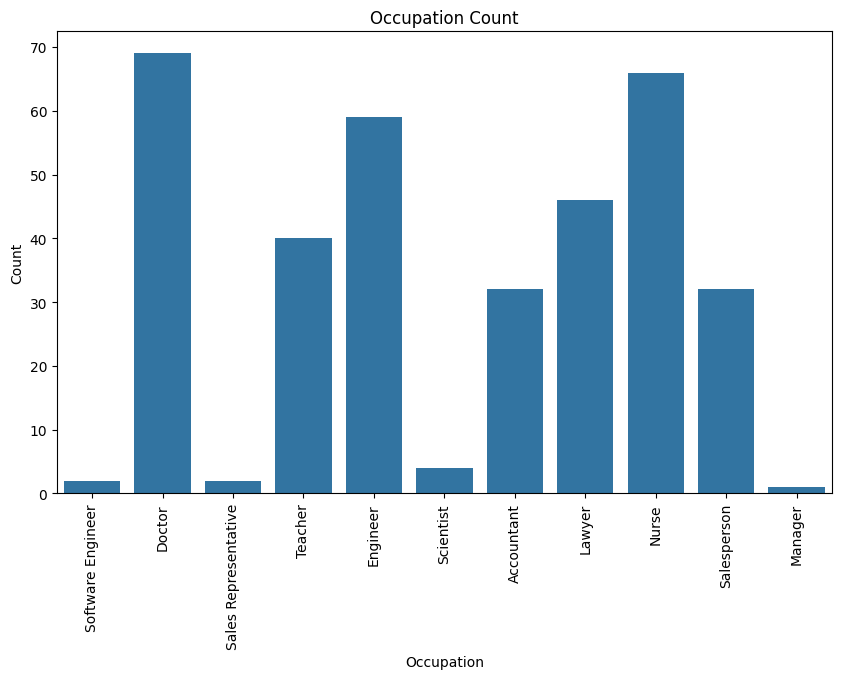

In [17]:
# Occupation Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Count')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

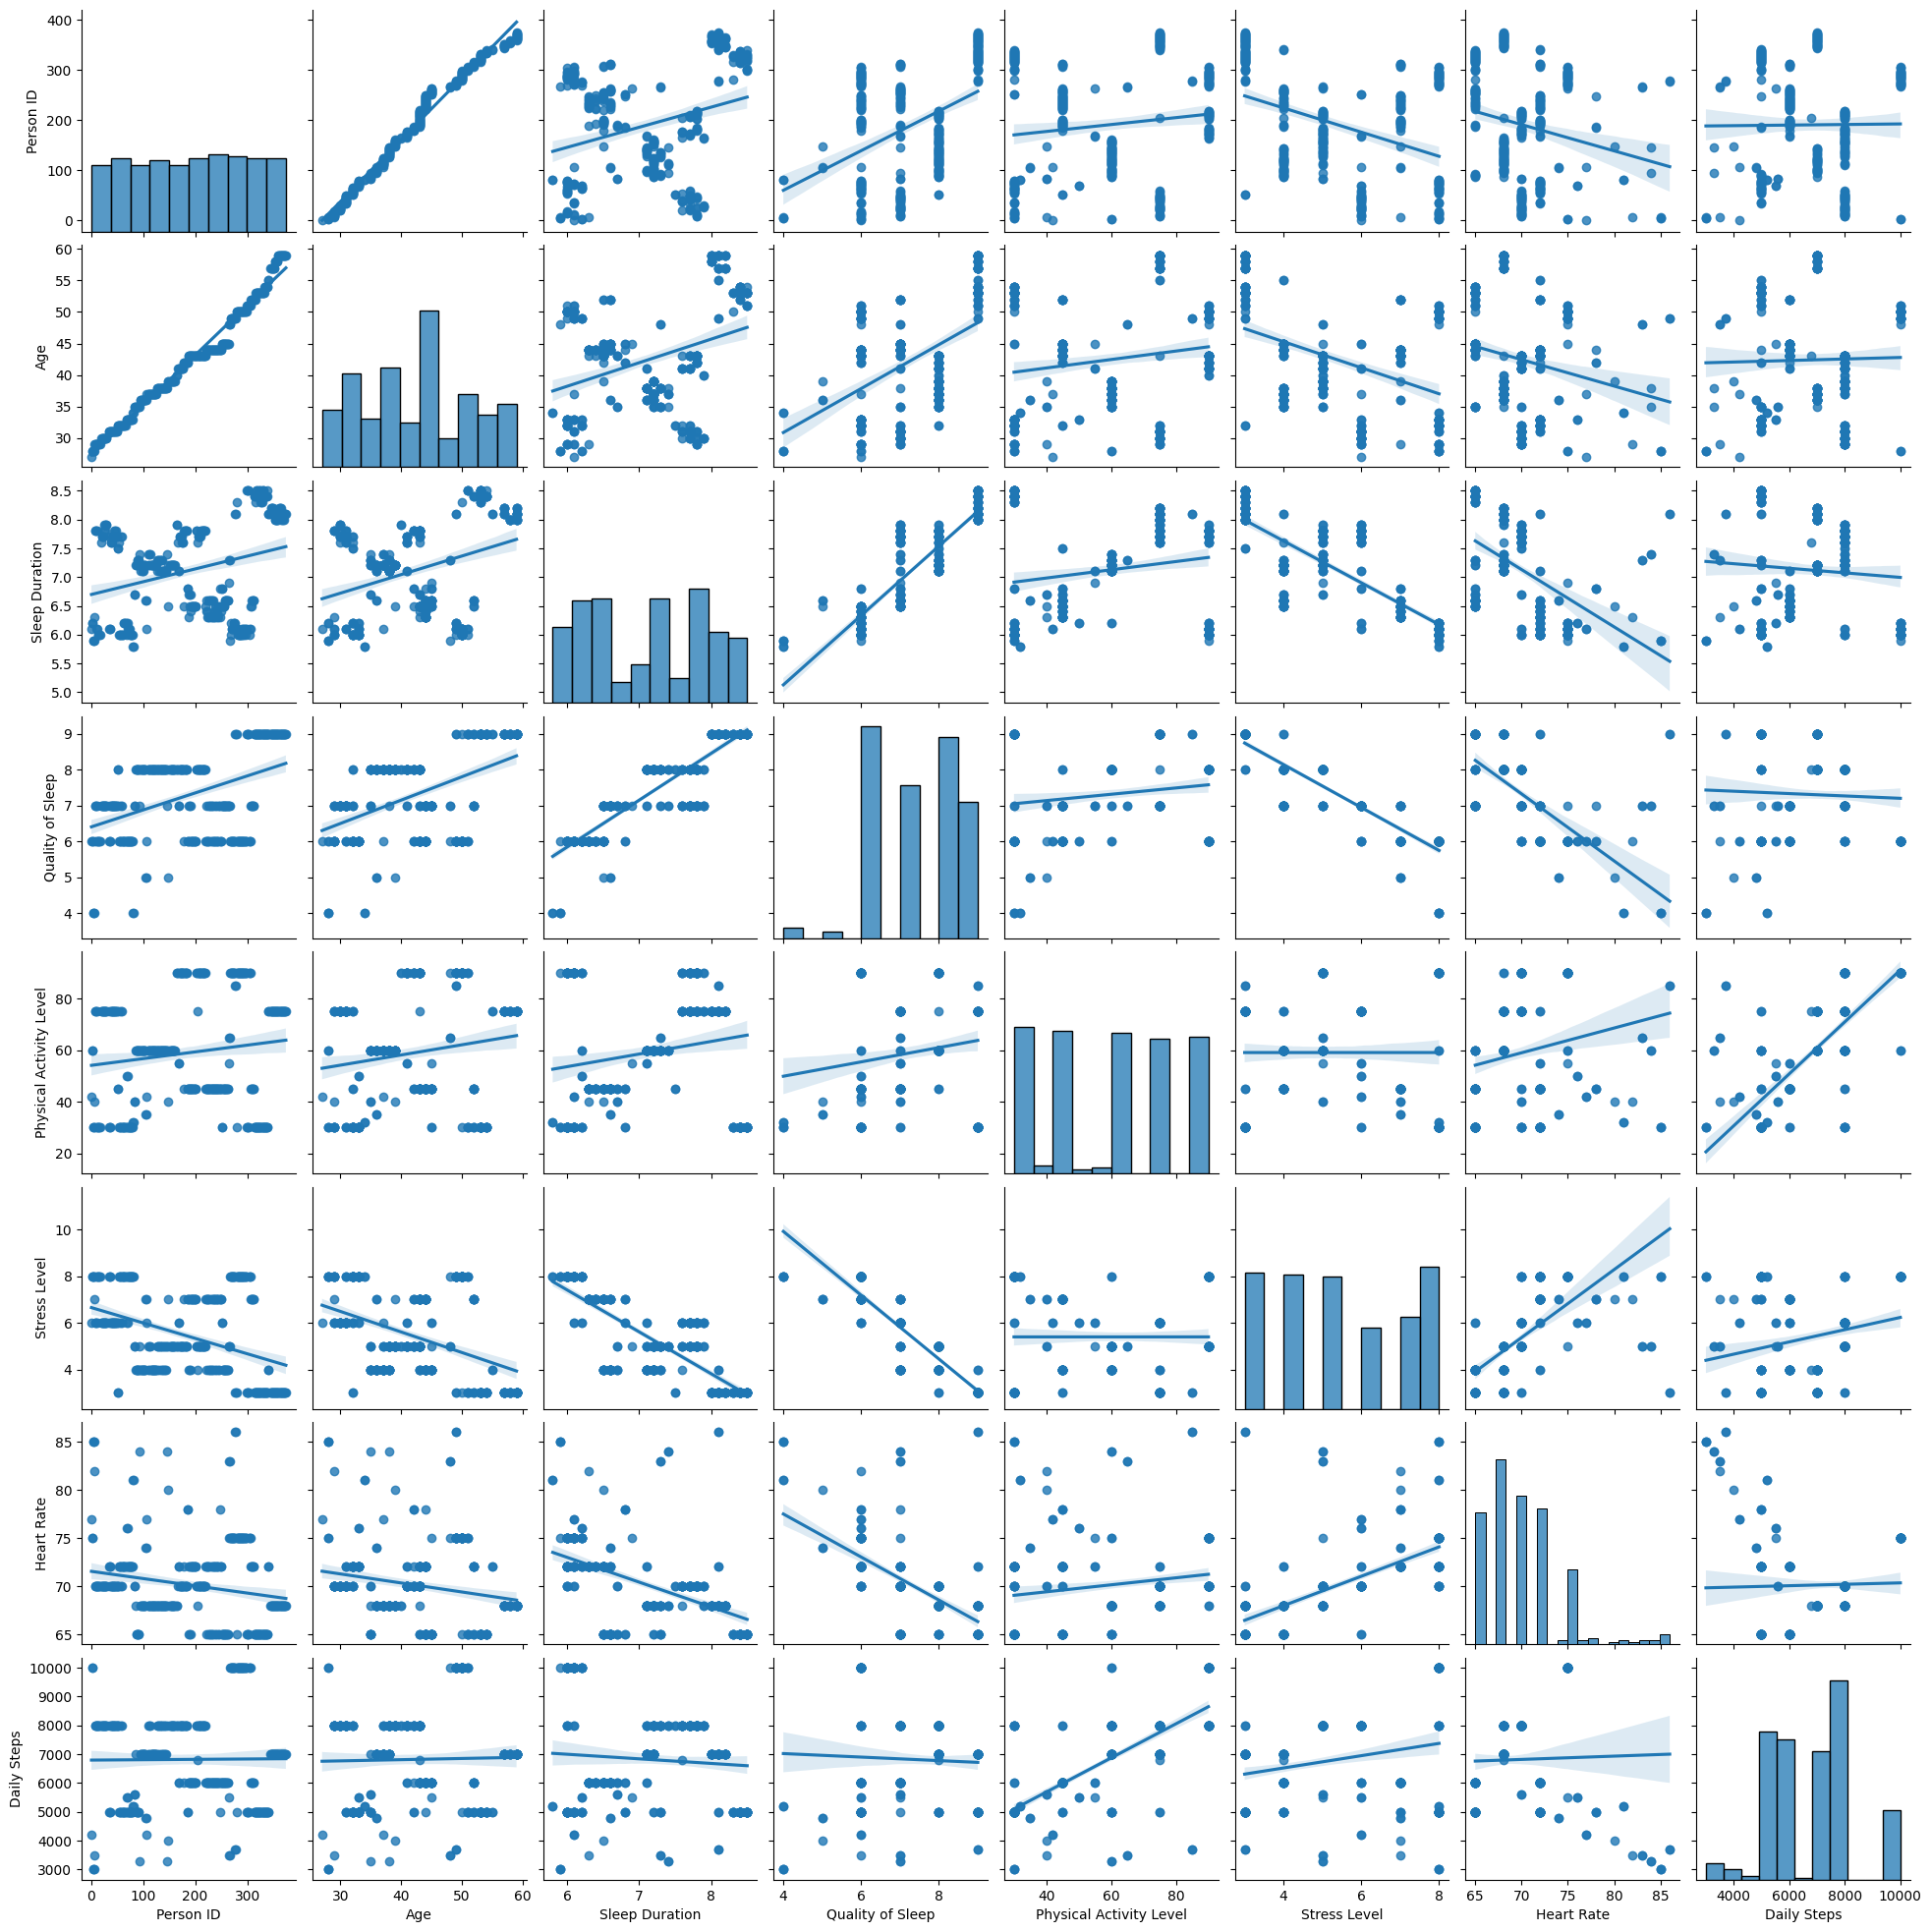

In [18]:
# Build pairplot
sns.pairplot(df, kind='reg')

### Things noticed in the pairplot
1. As sleep duration increases, stress level decreases.
2. As Quality of sleep increases, Heart Rate decreases, Stress Level decreases, Physical Activity increases

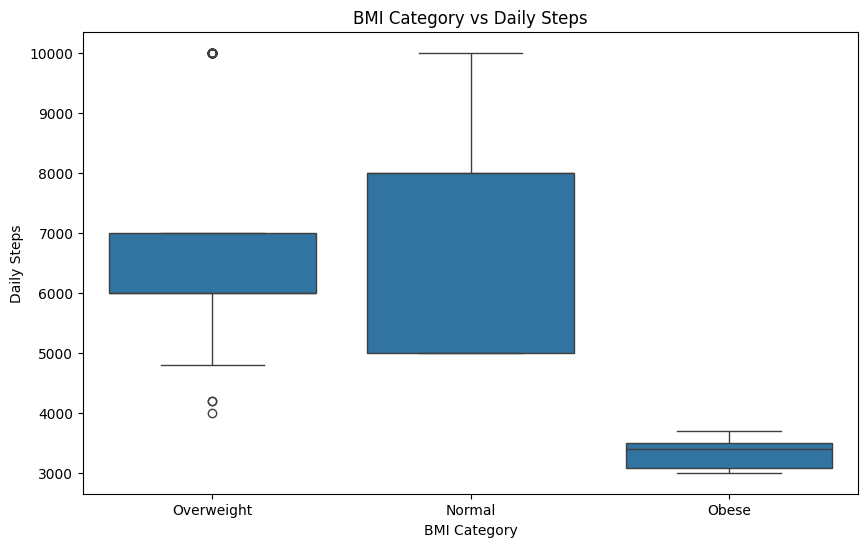

In [19]:
# Daily Steps vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Daily Steps', data=df)
plt.title('BMI Category vs Daily Steps')
plt.xlabel('BMI Category')
plt.ylabel('Daily Steps')
plt.show()

## 4. Splitting Data into Train/Test

In [20]:
# Create a data frame called X of your inputs that includes all columns except for Person Id, Blood Pressure, and Sleep Disorder
X = df.drop(['Person ID', 'Quality of Sleep', 'Blood Pressure', 'Sleep Disorder'], axis=1)
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,42,6,Overweight,77,4200
1,Male,28,Doctor,6.2,60,8,Normal,75,10000
2,Male,28,Doctor,6.2,60,8,Normal,75,10000
3,Male,28,Sales Representative,5.9,30,8,Obese,85,3000
4,Male,28,Sales Representative,5.9,30,8,Obese,85,3000
...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,75,3,Overweight,68,7000
370,Female,59,Nurse,8.0,75,3,Overweight,68,7000
371,Female,59,Nurse,8.1,75,3,Overweight,68,7000
372,Female,59,Nurse,8.1,75,3,Overweight,68,7000


In [21]:
# Create a data frame called y of your output that includes only the Quality of Sleep column. This will be your target variable that you are trying to predict.
y = df['Quality of Sleep']
y

0      6
1      6
2      6
3      4
4      4
      ..
369    9
370    9
371    9
372    9
373    9
Name: Quality of Sleep, Length: 353, dtype: int64

In [22]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 data frames: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5a. Building the Pipeline / Linear Regression Model

In [23]:
# Create a column transformer that will OneHotEncode the categorical variables and Standard Scaler the numerical variables (not the target variable)
num_attribs = ['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
cat_attrib = ['Gender', 'Occupation', 'BMI Category']

col_transform = ColumnTransformer(transformers=[
  ('num', StandardScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attrib)
], remainder='passthrough')


## 6a. Execute the Model / Linear Regression Model

In [24]:
# Create a pipeline that will transform the data and then run a Linear Regression
pipeline = Pipeline(steps=[
  ('col_transform', col_transform),
  ('lin_reg', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category'])])),
                ('lin_reg', LinearRegression())])

In [25]:
param_grid = {
  'lin_reg__fit_intercept': [True, False],
}

# Create a GridSearchCV object with the pipeline and param_grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Physical '
                                                                          'Activity '
                                                                          'Level',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Daily '
                                                                          'Steps']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Occupation',
                                                                          'BMI '
                                                                          'Category'])])),
                                       ('lin_reg', LinearRegression())]),
             param_grid={'lin_reg__fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

## 7a. Evaluating the Model / Linear Regression Model

In [26]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred
y_pred1 = pipeline.predict(X_test)
y_pred1

array([5.08712832, 7.94641483, 9.05527498, 6.01336962, 7.42836146,
       6.01336962, 8.06066759, 6.00838053, 7.06612348, 9.00402228,
       7.04294948, 8.96680893, 6.04144832, 9.10652768, 6.2563114 ,
       7.11432919, 7.94641483, 6.04643086, 6.04559388, 8.95437719,
       7.97632019, 7.1655819 , 8.3999476 , 7.11432919, 6.02740897,
       6.01336962, 6.71050855, 7.95816219, 5.83061534, 8.06066759,
       7.46664041, 7.88112277, 5.98030183, 5.98030183, 7.11737618,
       7.96228084, 8.11674361, 7.44240081, 6.03239151, 8.06066759,
       7.01487078, 7.11432919, 7.97632019, 8.38789986, 9.01966925,
       9.00402228, 8.06066759, 6.03155453, 4.58112698, 8.11674361,
       5.99517816, 9.05527498, 9.01966925, 6.00921751, 6.97765743,
       6.04559388, 9.00562989, 7.97632019, 8.88747753, 6.01336962,
       6.00838053, 7.87198813, 6.65717411, 5.98030183, 8.09788094,
       5.98113881, 6.04643086, 8.18203566, 7.11432919, 8.91716384,
       5.41887302])

In [27]:
# Calculate the root mean squared error for both train and test. In a Markdown comment below, the result, interpret the output you receive.
y_train_pred1 = pipeline.predict(X_train)
y_test_pred1 = pipeline.predict(X_test)

print(mean_squared_error(y_train, y_train_pred1) ** (0.5))
print(mean_squared_error(y_test, y_test_pred1) ** (0.5))

0.16986547241502867
0.2651032949379335


In [28]:
print(r2_score(y_test, y_pred1))

0.9517592245409573


## 5b. Building the Pipeline / SVM Model

In [29]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax Scale the numerical variables (not the target variable)
num_attribs = ['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
cat_attribs = ['Gender', 'Occupation', 'BMI Category']

col_transform = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attribs)
], remainder='passthrough')

## 6b. Execute the Model / SVM Model

In [30]:
# Create a pipeline that will transform the data and then run a Support Vector Machine Regression
pipeline = Pipeline(steps=[
  ('col_transform', col_transform),
  ('SVR', SVR(kernel='linear', C=50, max_iter=10000, epsilon=0.0))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category'])])),
                ('SVR',
                 SVR(C=50, epsilon=0.0, kernel='linear', max_iter=10000))])

## 7b. Evaluating the Model / SVM Model

In [31]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred
y_pred2 = pipeline.predict(X_test)
y_pred2

array([4.90201725, 8.02974099, 9.05516245, 5.94076455, 6.97747915,
       5.94076455, 8.04236273, 6.03354224, 6.97817625, 9.02227216,
       6.98727527, 9.01037652, 5.98275386, 9.08805274, 7.13054942,
       6.94723142, 8.02974099, 5.99095949, 6.04543787, 8.92996253,
       8.00202454, 6.98012171, 9.08691956, 6.94723142, 5.9617592 ,
       5.94076455, 7.07101105, 7.97658214, 5.97950486, 8.04236273,
       6.98518904, 7.97585604, 5.99155292, 5.99155292, 7.01106654,
       7.98102988, 7.97794853, 6.99847381, 5.96996483, 8.04236273,
       6.94528596, 6.94723142, 8.00202454, 8.39136945, 8.98384748,
       9.02227216, 8.04236273, 6.02444322, 5.41791117, 7.97794853,
       5.9580692 , 9.05516245, 8.98384748, 5.97906385, 6.93339032,
       6.04543787, 8.96285282, 8.00202454, 8.93549691, 5.94076455,
       6.03354224, 8.00594972, 6.39687433, 5.99155292, 8.05425837,
       5.93707454, 5.99095949, 8.03183348, 6.94723142, 8.91806689,
       6.12090933])

In [32]:
# Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output.
y_train_pred2 = pipeline.predict(X_train)
y_test_pred2 = pipeline.predict(X_test)

print(mean_squared_error(y_train, y_train_pred2) ** (0.5))
print(mean_squared_error(y_test, y_test_pred2) ** (0.5))

0.23451977437969
0.4083242531940627


In [33]:
print(r2_score(y_test, y_pred2))

0.8855556433472153


Based on the two models, it seems that the Linear Regression model is better at predicting Quality of Sleep